In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import EarlyStopping as es


# Python implementation of the gravity test problem from the regtools toolbox, see `Hansen (2008) <http://people.compute.dtu.dk/pcha/Regutools/RTv4manual.pdf>`_ for details
sample_size = 100  # 2**9
a = 0
b = 1
d = 0.25  # Parameter controlling the ill-posedness: the larger, the more ill-posed, default in regtools: d = 0.25

t = (np.arange(1, sample_size + 1) - 0.5) / sample_size
s = ((np.arange(1, sample_size + 1) - 0.5) * (b - a)) / sample_size
T, S = np.meshgrid(t, s)

design = (1 / sample_size) * d * (d**2 * np.ones((sample_size, sample_size)) + (S - T) ** 2) ** (-(3 / 2))
signal = np.sin(np.pi * t) + 0.5 * np.sin(2 * np.pi * t)
design_times_signal = design @ signal

# Set parameters
parameter_size = sample_size
max_iter = 2000
noise_level = 10 ** (-2)
# critical_value = sample_size * (noise_level**2)

#eigen_values = np.linalg.eig(design)
#print(f"The eigenvalues are given by \n {eigen_values}")

# Specify number of Monte Carlo runs
NUMBER_RUNS = 1

# Create observations
noise = np.random.normal(0, noise_level, (sample_size, NUMBER_RUNS))
observation = noise + design_times_signal[:, None]

model = es.Landweber(design, observation[:, 0], learning_rate=1 / 30, true_signal=signal, true_noise_level=noise_level)

model.iterate(max_iter)

# Stopping index
m = model.early_stopping_index

# Weak balanced oracle
weak_oracle = model.weak_balanced_oracle

# Strong balanced oracle
strong_oracle = model.strong_balanced_oracle

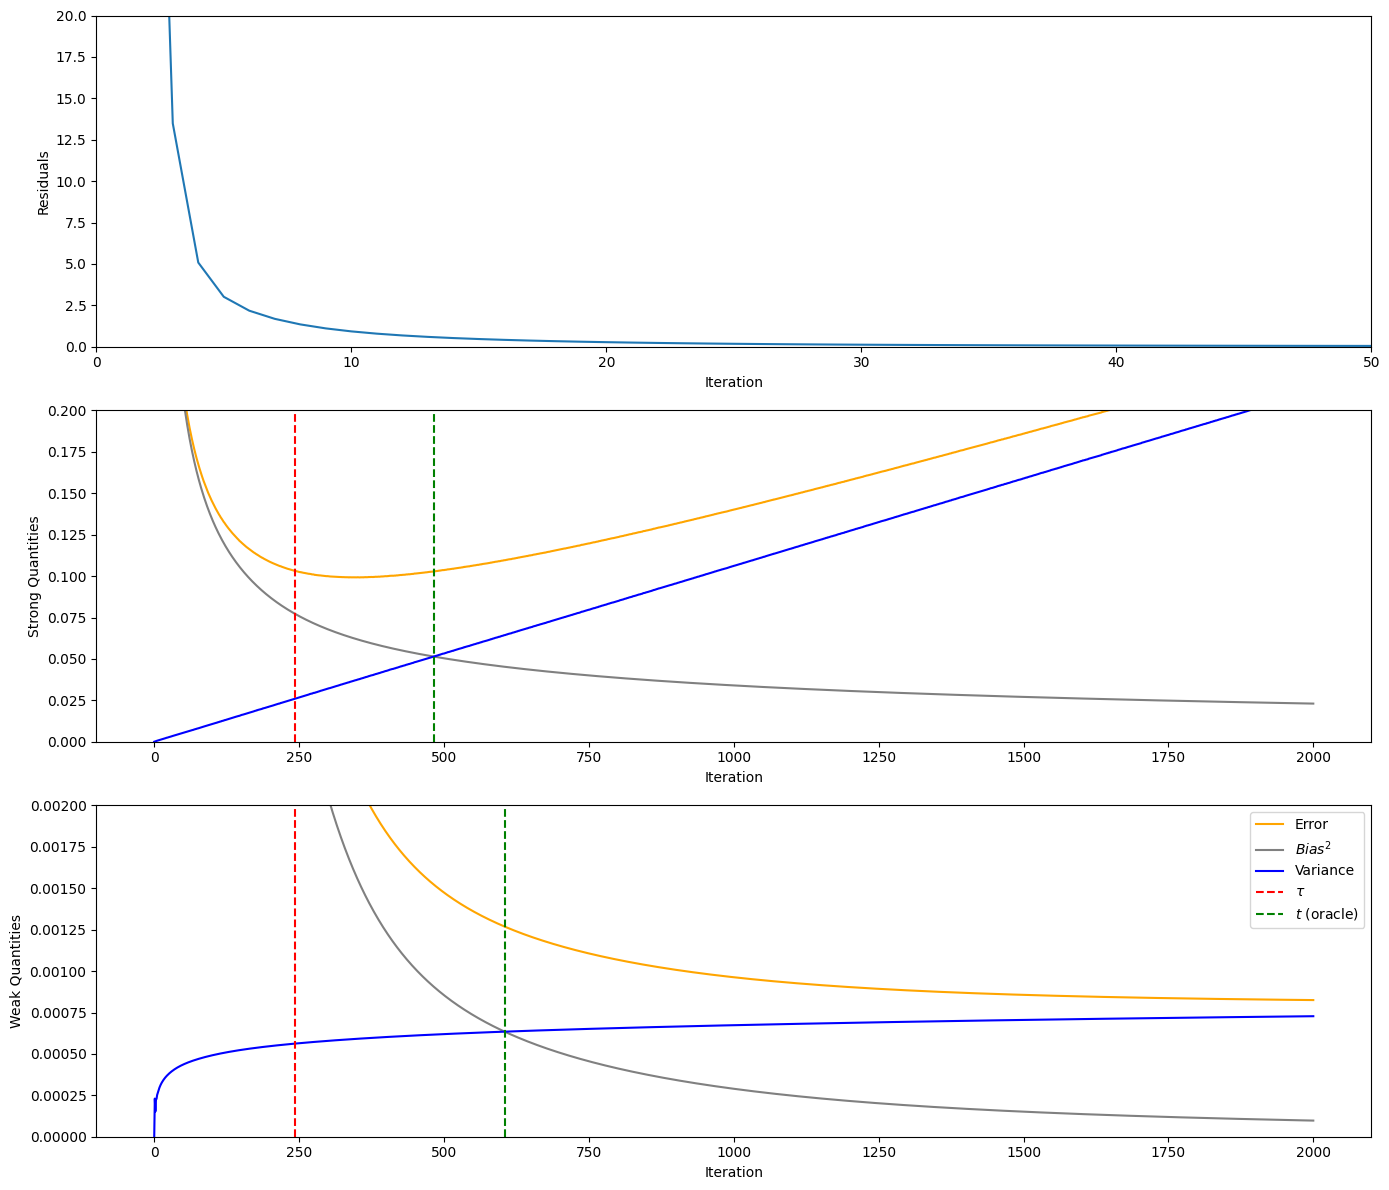

In [3]:

fig, axs = plt.subplots(3, 1, figsize=(14, 12))


axs[0].plot(range(0, max_iter + 1), model.residuals)
#axs[0].axvline(x=m, color="red", linestyle="--")
axs[0].set_xlim([0, 50])
axs[0].set_ylim([0, 20])
axs[0].set_xlabel("Iteration")
axs[0].set_ylabel("Residuals")


axs[1].plot(range(0, max_iter + 1), model.strong_error, color="orange", label="Error")
axs[1].plot(range(0, max_iter + 1), model.strong_bias2, label="$Bias^2$", color="grey")
axs[1].plot(range(0, max_iter + 1), model.strong_variance, label="Variance", color="blue")
axs[1].axvline(x=m, color="red", linestyle="--")
axs[1].axvline(x=strong_oracle, color="green", linestyle="--")
#axs[1].set_xlim([0, 50])
axs[1].set_ylim([0, 0.2])
axs[1].set_xlabel("Iteration")
axs[1].set_ylabel("Strong Quantities")

axs[2].plot(range(0, max_iter + 1), model.weak_error, color="orange", label="Error")
axs[2].plot(range(0, max_iter + 1), model.weak_bias2, label="$Bias^2$", color="grey")
axs[2].plot(range(0, max_iter + 1), model.weak_variance, label="Variance", color="blue")
axs[2].axvline(x=m, color="red", linestyle="--", label=r"$\tau$")
axs[2].axvline(x=weak_oracle, color="green", linestyle="--", label="$t$ (oracle)")
#axs[2].set_xlim([0, 400])
axs[2].set_ylim([0, 0.002])
axs[2].set_xlabel("Iteration")
axs[2].set_ylabel("Weak Quantities")
axs[2].legend()

plt.tight_layout()

plt.show()
